In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('parsedSurveyData.csv')
print(data.head())


       program               residence  rating  \
0  Engineering          UW Place (UWP)     7.0   
1  Engineering  Ron Eydt Village (REV)    10.0   
2  Engineering  Ron Eydt Village (REV)    10.0   
3  Engineering  Ron Eydt Village (REV)     6.0   
4  Engineering               Village 1     6.0   

   residence_Claudette Millar Hall (CMH)  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   residence_Columbia Lake Village South (CLV-South)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   residence_Mackenzie King Village (MKV)  residence_Ron Eydt Village (REV)  \
0                 

In [37]:
# Preprocess the data
# Encode categorical variables
le_program = LabelEncoder()
data['program_encoded'] = le_program.fit_transform(data['program'])

le_personality = LabelEncoder()
data['personality_encoded'] = le_personality.fit_transform(data['rating'])

le_residency = LabelEncoder()
data['Residency_encoded'] = le_residency.fit_transform(data['residence'])

# Selecting the X and Y
X = data[['program_encoded', 'personality_encoded']]
Y = data['Residency_encoded']

In [38]:
from sklearn.model_selection import train_test_split

# Split the Data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [39]:
from sklearn.tree import DecisionTreeClassifier

# Create and Train the Decision Tree Model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.25961538461538464
Precision (Weighted): 0.224384927990767
F1 Score (Weighted): 0.22880774491024913
R^2 Score: -0.8696253416948063


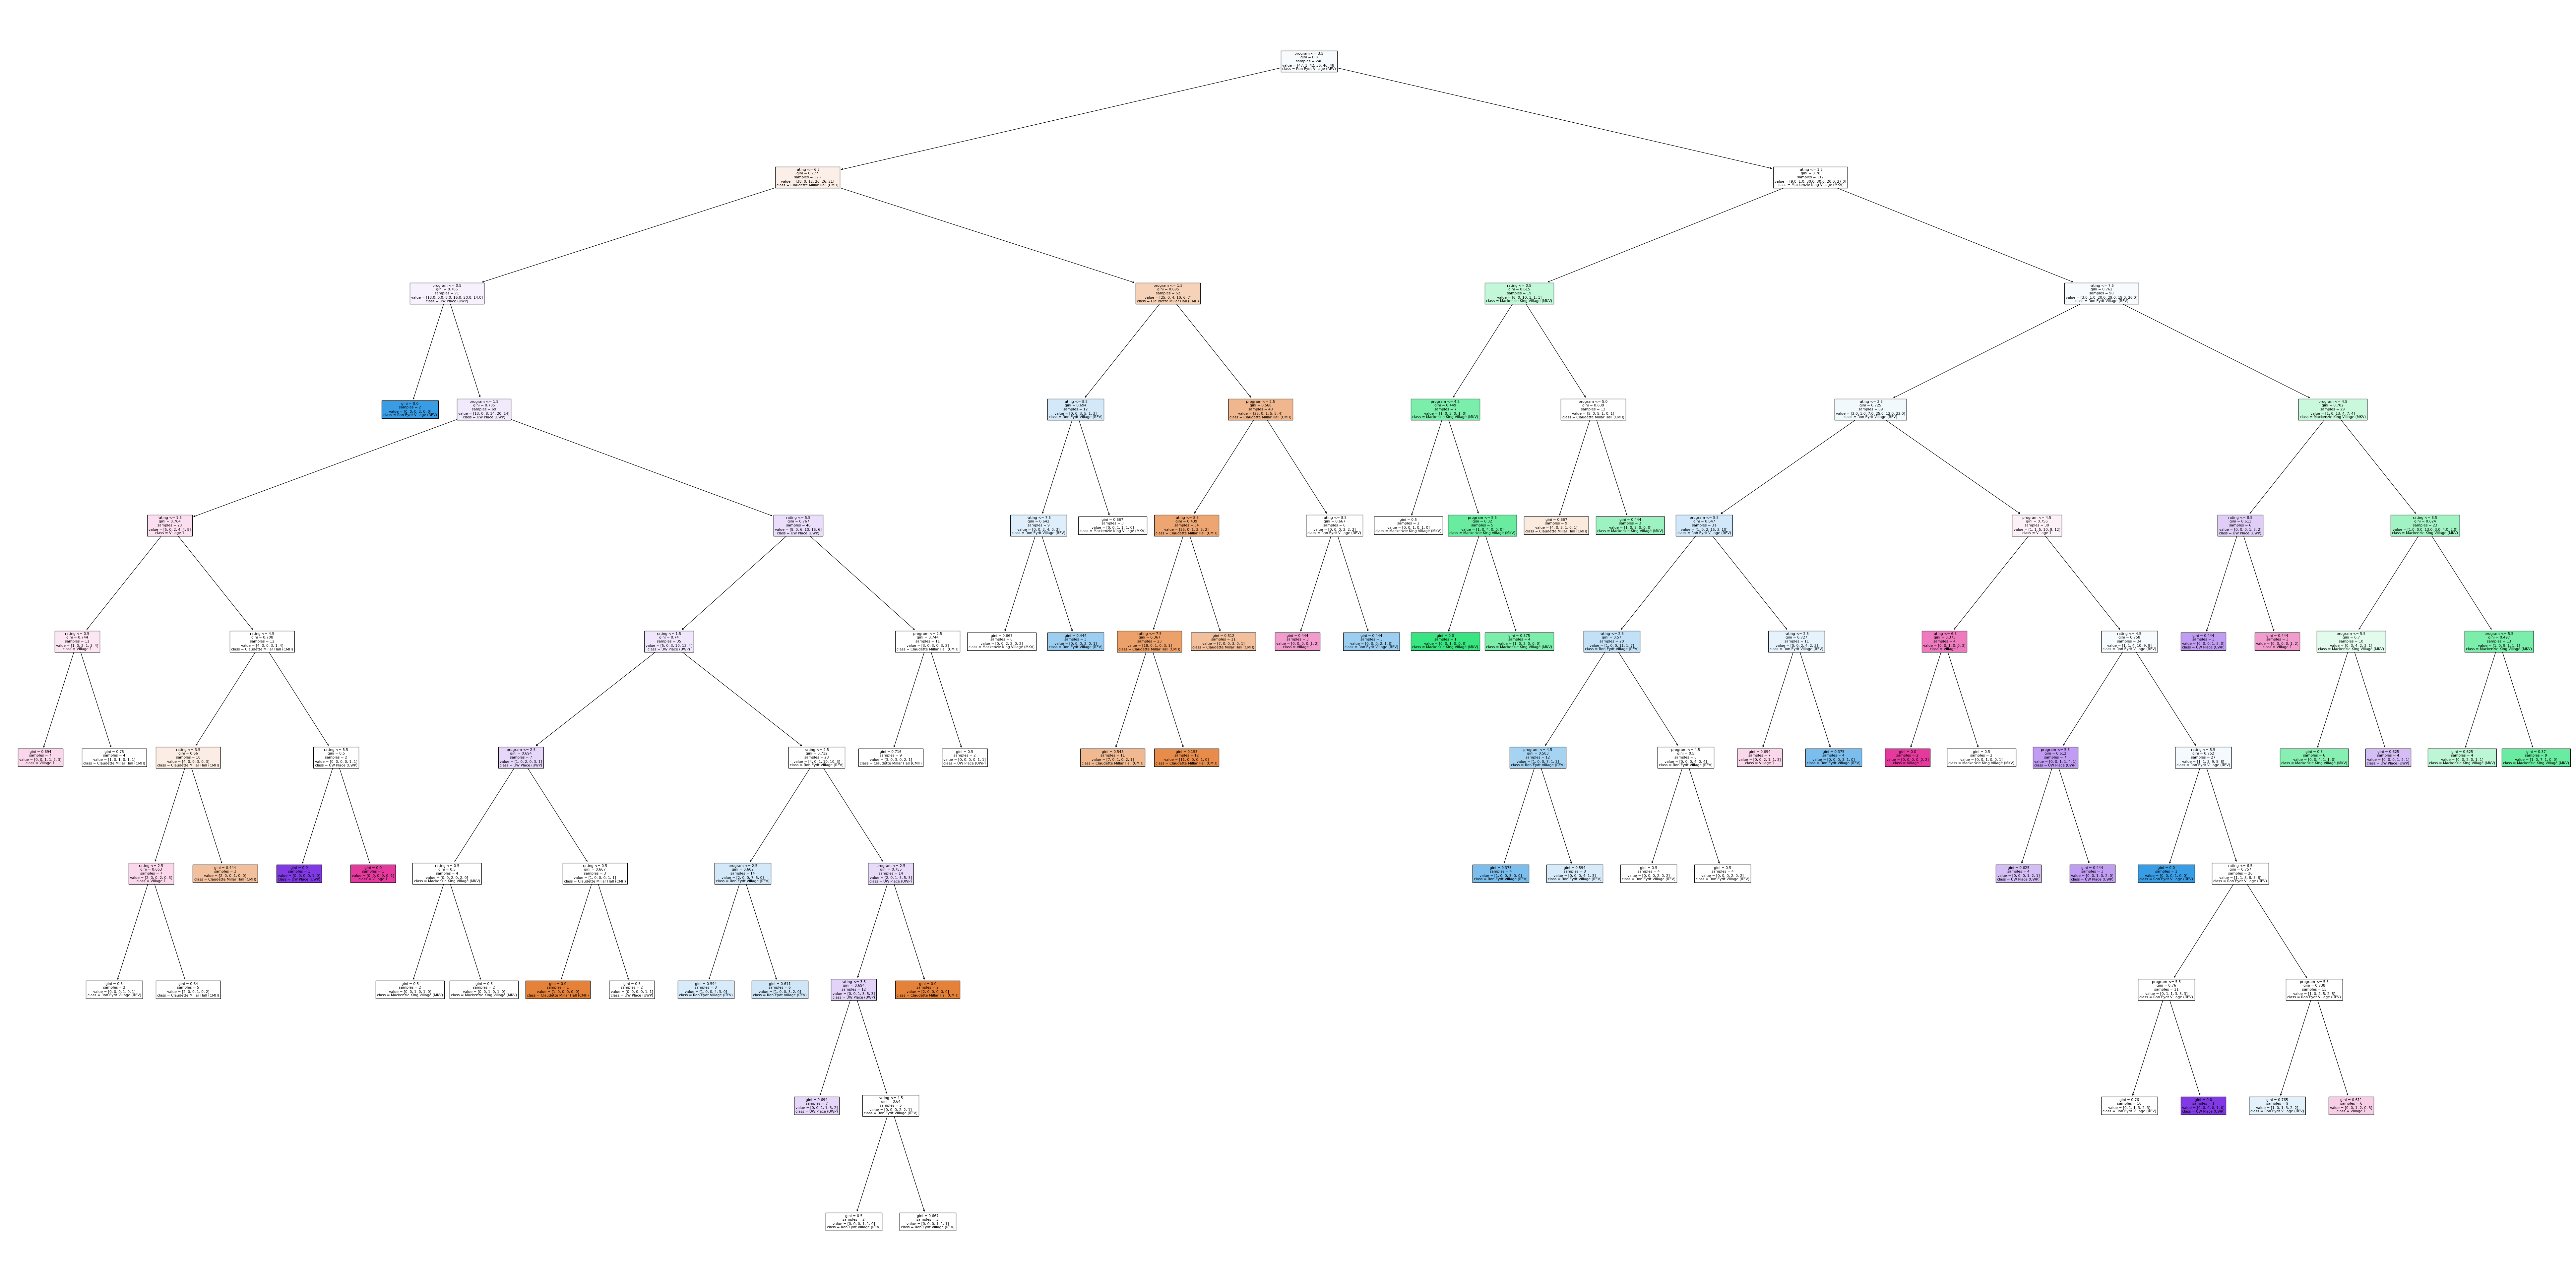

In [40]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

# Evaluate the Model
# Predictions
Y_pred = dt_classifier.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
# Since multiclass classification, precision needs to consider the average parameter
print("Precision (Weighted):", precision_score(Y_test, Y_pred, average='weighted'))
print("F1 Score (Weighted):", f1_score(Y_test, Y_pred, average='weighted'))
print("R^2 Score:", r2_score(Y_test, Y_pred))

# Visualizing the Decision Tree
plt.figure(figsize=(100, 50))
tree.plot_tree(dt_classifier, filled=True, feature_names=['program', 'rating'], class_names=le_residency.classes_)
plt.show()
